## Нейронные сети.


In [ ]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
sns.set(palette='rocket')

import torch
from torch import nn

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

 $w_{11}$ $w_{12}$ $w_{21}$ $w_{22}$ $b_{11}$ $b_{12}$ $b_{2}$ - парметры сети, суммарно их 7

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; ...$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; ...$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; ...$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \; ...$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; ...$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; ...$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

...

#Preamble

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$ h \in \{1, 2\}$$

$$w_{11}, \ w_{12}, \  w_{21}, \   w_{22}, \   b_{11}, \   b_{12}, \   b_{2} - парметры \ сети $$ \\

$$ MSE = L(X, Y) = \frac{1}{n}\sum_{i = 1}^{n} (Y_{i} - \widehat{y}(X_{i}))^{2}$$ <br>

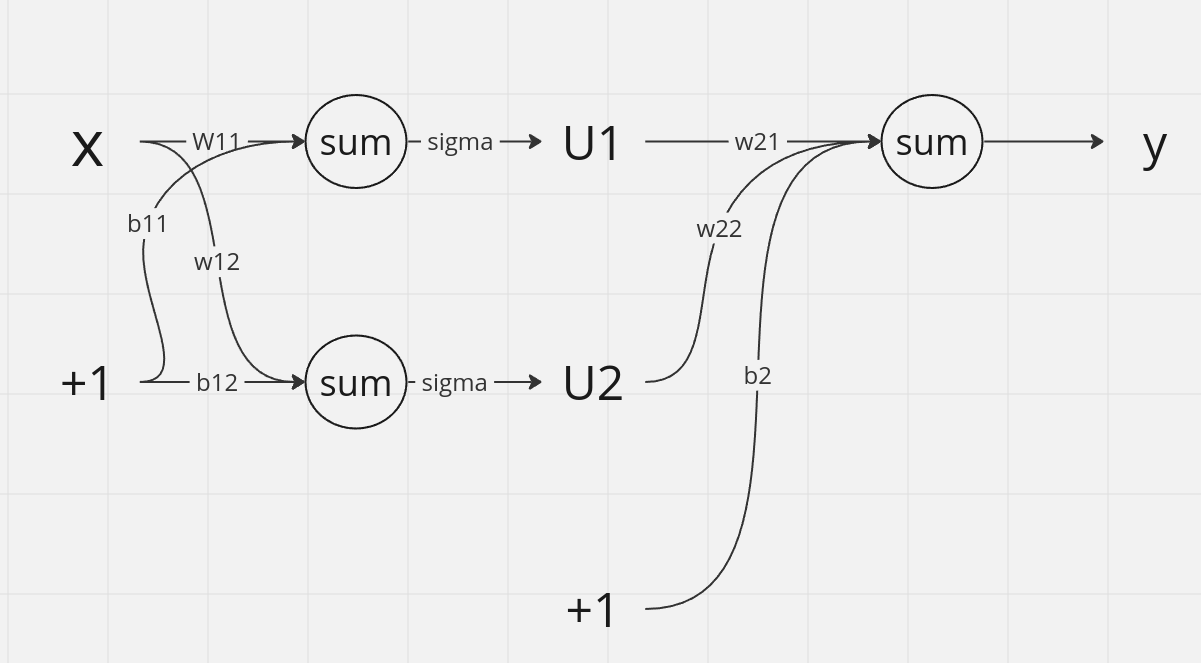

## 1.
$$w_{11}, \ w_{12}, \  w_{21}, \   w_{22}, \   b_{11}, \   b_{12}, \   b_{2} - парметры \ сети,\  суммарно \ их \ - 7$$ \\
## 2.
### 2.1.
$$\frac{\partial{MSE}}{\partial \widehat{y}(X_i)} = -\frac{2}{n} (Y_{i} - \widehat{y}(X_{i}))$$
### 2.2.
$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = u_{h}(X_{i}) $$ <br>
$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = 1$$ <br>
$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = w_{2h}$$ <br>
$$\frac{MSE}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial{MSE}}{\partial \widehat{y}(X_i) } \frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = - \frac{2}{n} \sum_{i = 1}^{n}(Y_{i} - \widehat{y}(X_{i})) * u_{h}(X_{i})$$ <br>

$$\frac{\partial{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial b_2} = - \frac{2}{n} \sum_{i = 1}^{n}(Y_{i} - \widehat{y}(X_{i}))$$ <br>

$$\frac{\partial{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial{MSE}}{\partial \widehat{y}(X_i) } \frac{\partial \widehat{y}(X_i) }{\partial u_h} = - \frac{2}{n} \sum_{i = 1}^{n}(Y_{i} - \widehat{y}(X_{i})) * w_{2h}$$ <br>
                
### 2.3.

$$\frac{\partial\:\sigma(x)}{\partial x} = ((1 + e^{-x})^{-1})_{x}^{'} = (1 + e^{-x})^{-2} * e^{-x}$$
$$\sigma(x) = \frac{1}{1 + e^{-x}} \Rightarrow{} e^{-x} = \frac{1}{\sigma(x)} - 1 = \frac{1 - \sigma(x)}{\sigma(x)}$$

$$\frac{\partial\:\sigma(x)}{\partial x} ={\partial x} = \sigma(x) (1 - \sigma(x))$$       
$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \sigma(w_{1h}x_{i} + b_{1h}) * (1 - \sigma(w_{1h}x_{i} + b_{1h})) * x_{i}$$ <br>

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \sigma(w_{1h}x_{i} + b_{1h}) * (1 - \sigma(w_{1h}x_{i} + b_{1h})) $$ <br>

$$\frac{\partial{MSE}}{\partial w_{1h}} = \sum_{i=1}^n \frac{\partial{MSE}}{\partial u_{h}(X_{i})} \frac{\partial u_{h}(X_{i})}{\partial w_{1h}} = \frac{2}{n} \sum_{i = 1}^{n} (y(x_{i}) - Y_{i})w_{2h} \sigma(w_{1h}x_{i} + b_{1h}) * (1 - \sigma(w_{1h}x_{i} + b_{1h})) * x_{i}$$ <br>

$$\frac{\partial{MSE}}{\partial b_{1h}} = \sum_{i=1}^n \frac{\partial{MSE}}{\partial u_{h}(X_{i})} \frac{\partial u_{h}(X_{i})}{\partial b_{1h}} = \frac{2}{n} \sum_{i = 1}^{n} (y(x_{i}) - Y_{i})w_{2h} \sigma(w_{1h}x_{i} + b_{1h}) * (1 - \sigma(w_{1h}x_{i} + b_{1h}))$$ <br>

## 3.
Когда обучающая выборка очень большая, обычные методы обновления параметров в алгоритмах машинного обучения могут быть слишком медленными или требовательными к вычислительным ресурсам. В таких случаях можно использовать стохастический градиентный спуск (Stochastic Gradient Descent, SGD) или его вариации, чтобы ускорить обучение. \\
Mini-batch SGD: Вместо обновления параметров по всей обучающей выборке на каждой итерации, выбирается случайный небольшой набор данных (mini-batch) и параметры обновляются на основе градиента, вычисленного только на этом mini-batch. Это позволяет ускорить обучение и уменьшить требования к памяти.

обновление параметров: $\theta_{t} = \theta_{t - 1} - lr * \nabla L_{\theta}(X_{i_{1}, ... , i_{k}})$ <br>
$ θ_{t}$ - параметры на t-ом шаге, $lr$ - learning rate  L_{\theta}(X_{i_{1}, ... , i_{k}})$ - градиент L на выборке i_{1}, ... , i_{k} - батч размера k

---
### Задача 2.

Напишите нейронную сеть из задачи 1 с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

In [ ]:
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=2),
    nn.Sigmoid(),
    nn.Linear(in_features=2, out_features=1)
)

print("parametrs:")
for name, param in model.named_parameters():
    print(name)
    print(param.data)

print("===========================================================================\nmodel:")
model

parametrs:
0.weight
tensor([[ 0.3219],
        [-0.5827]])
0.bias
tensor([0.9505, 0.1522])
2.weight
tensor([[0.6336, 0.1013]])
2.bias
tensor([-0.4857])
model:


Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
)

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

In [ ]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
y = np.sin(X).reshape(-1)

X_train = torch.tensor(X, dtype=torch.float)
y_train = torch.tensor(y, dtype=torch.float)

test_sample_size = int(1e6)

X = sps.norm.rvs(size=(test_sample_size, 1))
Y = np.sin(X).reshape(-1)

X_test = torch.tensor(X, dtype=torch.float)
y_test = torch.tensor(Y, dtype=torch.float)

X_train_new = X_train.reshape(-1, 1)
Y_train_new = y_train.reshape(-1, 1)

assert y.shape == (sample_size,)

Обучите нейросеть на этих данных. Используйте код с занятия.

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optim_func = nn.MSELoss()

num_iter = 1000

train_loss = []

for i in range(num_iter):

    y_pred = model(X_train_new)

    loss = optim_func(y_pred, Y_train_new)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    train_loss.append(loss.item())

Визуализируйте предсказания и посчитайте MSE на тестовой части данных.

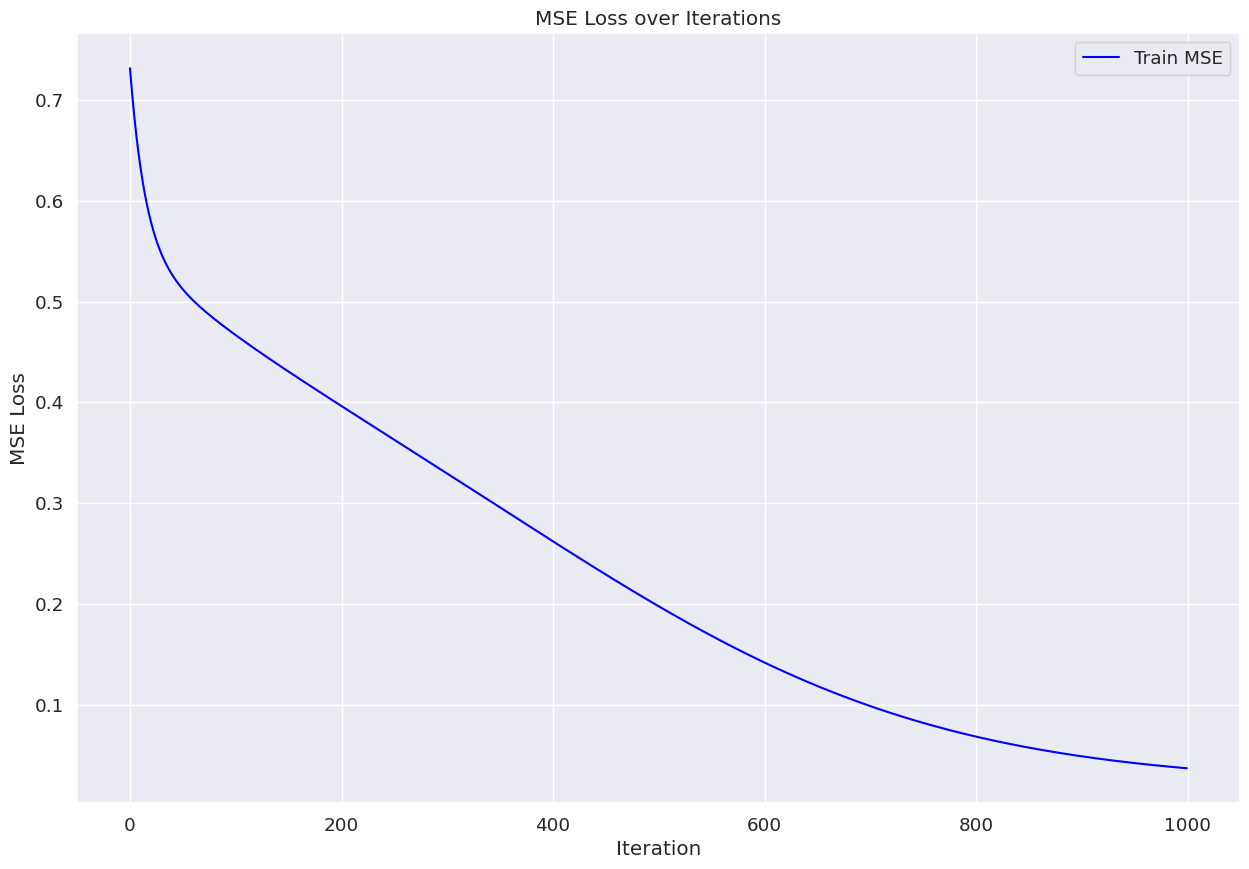

In [ ]:
iterations = range(num_iter)
plt.figure(figsize=(15, 10))
plt.plot(iterations, train_loss,color = "blue", label='Train MSE')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('MSE Loss over Iterations')
plt.legend()
plt.show()

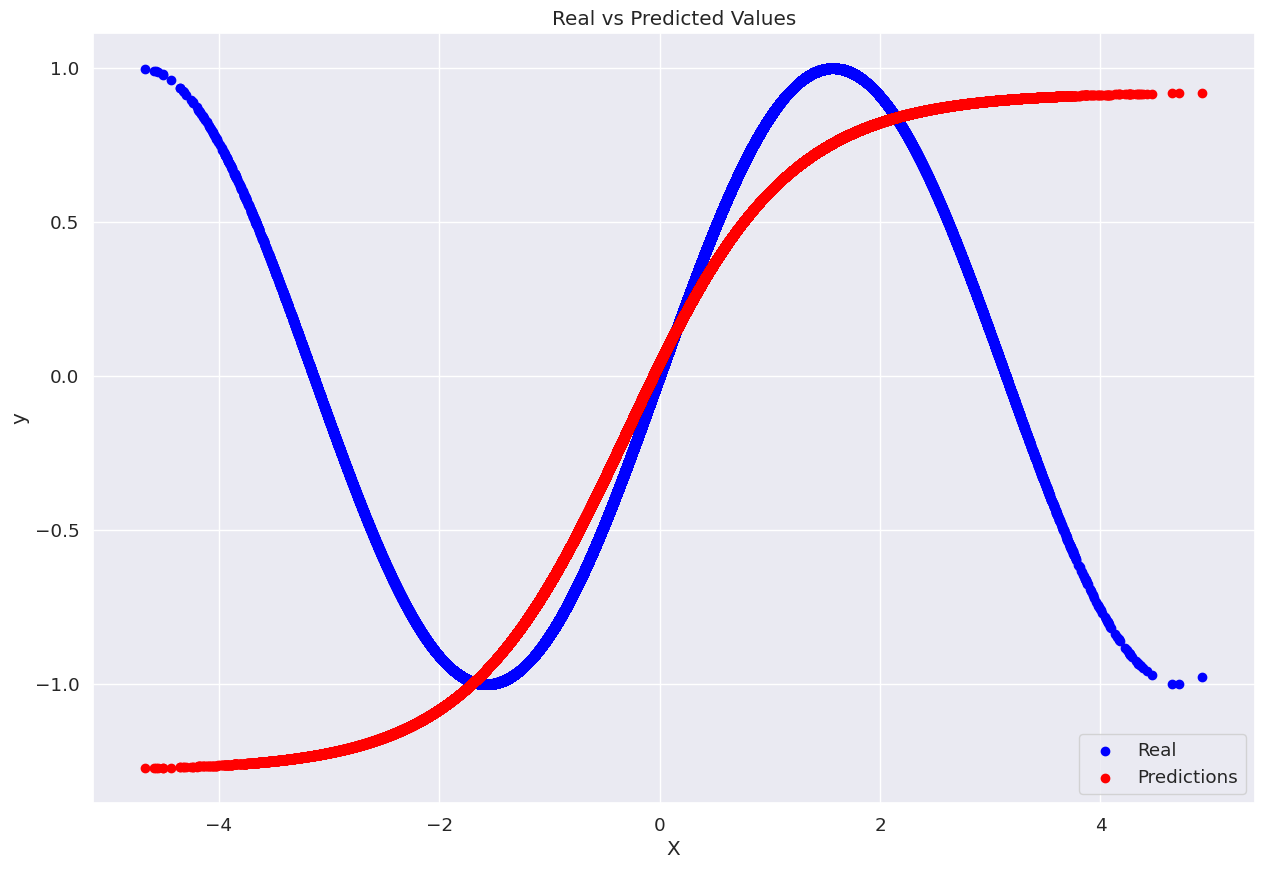

In [ ]:
predictions = model(X_test)

plt.figure(figsize=(15, 10))

plt.scatter(X_test, y_test, color = 'blue', label='Real')
plt.scatter(X_test, predictions.detach().numpy(), color='red', label='Predictions')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Real vs Predicted Values')
plt.legend()
plt.show()

In [ ]:
print("MSE for X_test:")
print(float(torch.mean((y_test.view(-1) - predictions.view(-1)) ** 2)))

MSE for X_test:
0.032202333211898804


**Вывод:**
...

---
### Задача 3.

Теперь реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. <a href="https://miptstats.github.io/courses/ad_fivt/task3.html#Задача-4." target="_blank">шаблон класса задачи 4 из задания 3</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [ ]:
def Sigmoid(x : np.array) -> np.array:
  return 1 / (np.exp(-x) + 1)

def MSE(y_real, y_pred) -> int:
  return np.mean((y_real - y_pred)**2)

class NeuralNetwork:
    def __init__(self):
        self.b_1 = np.random.rand(2) # b[0] -> b_11 b[1] -> b_12
        self.b_2 = np.random.rand(1) # b_2 -> b_2
        self.w = np.random.rand(2, 2) # w[0][0] -> w_11 w[0][1] -> w_12 w[1][0] -> w_21 w[1][1] -> w_22

    def parameter():
      pass

    def fit(self, X : np.array, Y : np.array, batch_size=1024, iteration=10, lr=0.01):
        '''
        Обучение модели ridge-регрессии.

        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''

        n = len(X)

        for iter in range(iteration):
          Y_pred = self.predict(X)

          u_1 = Sigmoid(X * self.w[0][0] + self.b_1[0])
          u_2 = Sigmoid(X * self.w[0][1] + self.b_1[1])

          dMSE_dw21 = - 2 / n * np.sum((Y - Y_pred) * u_1)
          dMSE_dw22 = - 2 / n * np.sum((Y - Y_pred) * u_2)
          dMSE_db2 = - 2 / n  *  np.sum(Y - Y_pred)

          temp_sigmoid = Sigmoid(self.w[0][0] * X + self.b_1[0])
          dMSE_dw11 = 2 / n * np.sum((Y_pred - Y) * self.w[1][0] * temp_sigmoid * (1 - temp_sigmoid) * X)
          dMSE_db11 = 2 / n * np.sum((Y_pred - Y) * self.w[1][0] * temp_sigmoid * (1 - temp_sigmoid))

          temp_sigmoid = Sigmoid(self.w[0][1] * X + self.b_1[1])
          dMSE_dw12 = 2 / n * np.sum((Y_pred - Y) * self.w[1][1] * temp_sigmoid * (1 - temp_sigmoid) * X)
          dMSE_db12 = 2 / n * np.sum((Y_pred - Y) * self.w[1][1] * temp_sigmoid * (1 - temp_sigmoid))

          self.w[0][0] -= lr * dMSE_dw11
          self.w[0][1] -= lr * dMSE_dw12
          self.w[1][0] -= lr * dMSE_dw21
          self.w[1][1] -= lr * dMSE_dw22

          self.b_1[0] -= lr * dMSE_db11
          self.b_1[1] -= lr * dMSE_db12

          self.b_2 -= lr * dMSE_db2


    def predict(self, X : np.array) -> np.array:
        '''
        Вычисление предсказаний.

        Аргументы:
        X -- numpy-матрица объект-признак размера (n, 1);

        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n, 1).
        '''

        u1 = Sigmoid(X * self.w[0][0] + self.b_1[0])
        u2 = Sigmoid(X * self.w[0][1] + self.b_1[1])

        prediction = u1 * self.w[1][0] + u2 * self.w[1][1] + self.b_2

        return prediction

0.6817866862451024


xОбучите нейронную сеть на рассмотренных ранее данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`. Сравните эту нейросеть, линейную регрессию и pytorch-сеть из задачи 2.

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

Повторите вычисления для другой нелинейной функции $y(x)$.

**Вывод:**
...